### Importing Libraries

In [1]:
import joblib
import pandas as pd
import numpy as np

### Loading Models and Vectorizer

In [3]:
model_A = joblib.load("Model_A.pkl")
vec_A = joblib.load("Vec_A.pkl")

model_B = joblib.load("Model_B.pkl")
vec_B = joblib.load("Vec_B.pkl")

In [8]:
bal = pd.read_csv("balanced_test_set.csv")
imb = pd.read_csv("imbalanced_test_set.csv")

x_test_bal_clean = bal['cleaned_review'].astype(str)
y_test_bal = bal['rating']

x_test_imb_clean = imb['cleaned_review'].astype(str)
y_test_imb = imb['rating']

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
def evaluate_model(model, vectorizer, x_texts, y_true, model_name = "model"):

    #transform
    X_vec = vectorizer.transform(x_texts)

    y_pred = model.predict(X_vec)

    accuracy = accuracy_score(y_true, y_pred)
    precision_weighted = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall_weighted = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1_weighted = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    precision_macro = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall_macro = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_true, y_pred, average='macro', zero_division=0)
    
    class_report = classification_report(y_true, y_pred, zero_division=0, output_dict=True)

    cm = confusion_matrix(y_true, y_pred, labels=sorted(np.unique(y_true)))
    labels = sorted(np.unique(y_true))

    print(f"\n=== Evaluation: {model_name} ")
    print(f"Samples evaluated: {len(y_true)}")
    print(f"Accuracy       : {accuracy:.6f}")
    print(f"Precision (weighted): {precision_weighted:.6f}")
    print(f"Recall    (weighted): {recall_weighted:.6f}")
    print(f"F1 Score  (weighted): {f1_weighted:.6f}")
    print(f"Precision (macro): {precision_macro:.6f}")
    print(f"Recall    (macro): {recall_macro:.6f}")
    print(f"F1 Score  (macro): {f1_macro:.6f}")
    print(f"\nConfusion Matrix : \n\n",cm)
    print("\nPer-class metrics:")

    df_report = pd.DataFrame(class_report).transpose()
    display(df_report)

    # heatmap
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='viridis')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()


    return {
        "model_name": model_name,
        "accuracy": accuracy,
        "precision_weighted": precision_weighted,
        "recall_weighted": recall_weighted,
        "f1_weighted": f1_weighted,
        "precision_macro": precision_macro,
        "recall_macro": recall_macro,
        "f1_macro": f1_macro,
        "per_class_report": df_report,
        "confusion_matrix": cm,
        "labels": labels,
        "y_pred": y_pred
    }

### Cross Testing Models


=== Evaluation: Model A on BALANCED Test 
Samples evaluated: 2000
Accuracy       : 0.627500
Precision (weighted): 0.611735
Recall    (weighted): 0.627500
F1 Score  (weighted): 0.616739
Precision (macro): 0.611735
Recall    (macro): 0.627500
F1 Score  (macro): 0.616739

Confusion Matrix : 

 [[372  11  10   5   2]
 [ 30 317  36  12   5]
 [ 42  65 160  80  53]
 [ 13  25  84 153 125]
 [  7   9  27 104 253]]

Per-class metrics:


,precision,recall,f1-score,support
1,0.801724,0.9300,0.861111,400.0000
2,0.742389,0.7925,0.766626,400.0000
3,0.504732,0.4000,0.446304,400.0000
4,0.432203,0.3825,0.405836,400.0000
5,0.577626,0.6325,0.603819,400.0000
accuracy,0.627500,0.6275,0.627500,0.6275
macro avg,0.611735,0.6275,0.616739,2000.0000
weighted avg,0.611735,0.6275,0.616739,2000.0000


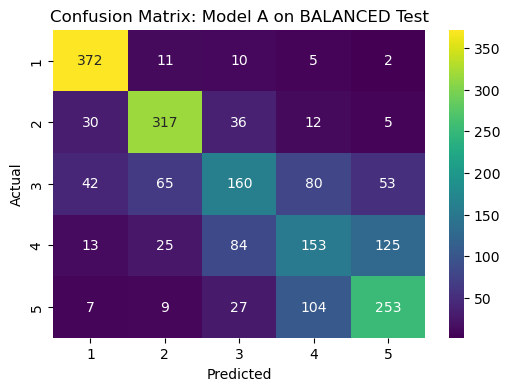

In [43]:
# model A on balanced test 
result_A_on_bal = evaluate_model(model_A, vec_A, x_test_bal_clean, y_test_bal, model_name="Model A on BALANCED Test")


=== Evaluation: Model B on IMBALANCED Test 
Samples evaluated: 7319
Accuracy       : 0.652002
Precision (weighted): 0.690913
Recall    (weighted): 0.652002
F1 Score  (weighted): 0.659355
Precision (macro): 0.612053
Recall    (macro): 0.747333
F1 Score  (macro): 0.661064

Confusion Matrix : 

 [[ 396    3    1    0    0]
 [   5  383    5    4    3]
 [  48   93  490  100   44]
 [  51   70  319  866  429]
 [  54   80  327  911 2637]]

Per-class metrics:


,precision,recall,f1-score,support
1,0.714801,0.990000,0.830189,400.000000
2,0.608903,0.957500,0.744412,400.000000
3,0.429072,0.632258,0.511215,775.000000
4,0.460393,0.499135,0.478982,1735.000000
5,0.847093,0.657770,0.740522,4009.000000
accuracy,0.652002,0.652002,0.652002,0.652002
macro avg,0.612053,0.747333,0.661064,7319.000000
weighted avg,0.690913,0.652002,0.659355,7319.000000


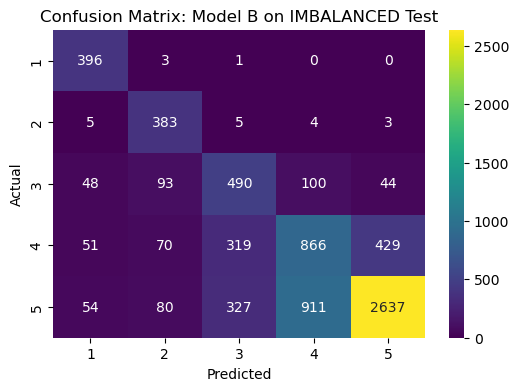

In [44]:
# model A on imbalanced test (Cross-Test)
result_A_on_imb = evaluate_model(model_A, vec_A, x_test_imb_clean, y_test_imb, model_name="Model B on IMBALANCED Test")


=== Evaluation: Model B on imbalanced Test 
Samples evaluated: 7319
Accuracy       : 0.677552
Precision (weighted): 0.647664
Recall    (weighted): 0.677552
F1 Score  (weighted): 0.652643
Precision (macro): 0.651287
Recall    (macro): 0.608604
F1 Score  (macro): 0.619294

Confusion Matrix : 

 [[ 346    9   19   10   16]
 [  22  274   43   25   36]
 [  41   45  219  262  208]
 [  23   10  113  559 1030]
 [  13    4   52  379 3561]]

Per-class metrics:


,precision,recall,f1-score,support
1,0.777528,0.865000,0.818935,400.000000
2,0.801170,0.685000,0.738544,400.000000
3,0.491031,0.282581,0.358722,775.000000
4,0.452632,0.322190,0.376431,1735.000000
5,0.734075,0.888251,0.803837,4009.000000
accuracy,0.677552,0.677552,0.677552,0.677552
macro avg,0.651287,0.608604,0.619294,7319.000000
weighted avg,0.647664,0.677552,0.652643,7319.000000


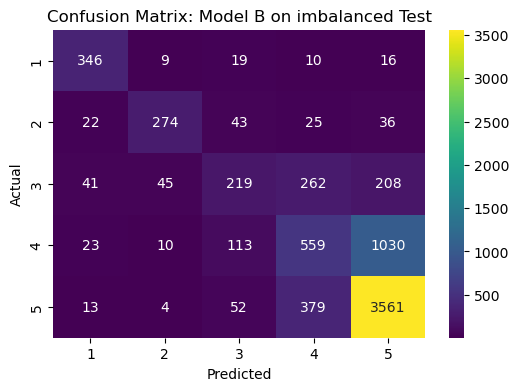

In [45]:
# model B on iimbalanced test 
result_B_on_imb = evaluate_model(model_B, vec_B, x_test_imb_clean, y_test_imb, model_name="Model B on imbalanced Test")


=== Evaluation: Model B on balanced Test 
Samples evaluated: 2000
Accuracy       : 0.819500
Precision (weighted): 0.839940
Recall    (weighted): 0.819500
F1 Score  (weighted): 0.818864
Precision (macro): 0.839940
Recall    (macro): 0.819500
F1 Score  (macro): 0.818864

Confusion Matrix : 

 [[383   2   8   3   4]
 [  7 359  16  12   6]
 [  4  11 279  56  50]
 [  1   2   6 234 157]
 [  0   0   1  15 384]]

Per-class metrics:


,precision,recall,f1-score,support
1,0.969620,0.9575,0.963522,400.0000
2,0.959893,0.8975,0.927649,400.0000
3,0.900000,0.6975,0.785915,400.0000
4,0.731250,0.5850,0.650000,400.0000
5,0.638935,0.9600,0.767233,400.0000
accuracy,0.819500,0.8195,0.819500,0.8195
macro avg,0.839940,0.8195,0.818864,2000.0000
weighted avg,0.839940,0.8195,0.818864,2000.0000


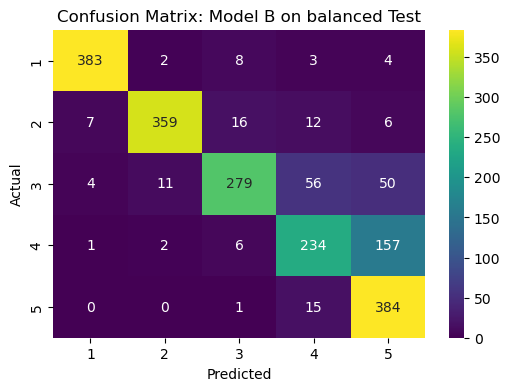

In [46]:
# model B on balanced test (Cross-Test)
result_B_on_bal = evaluate_model(model_B, vec_B, x_test_bal_clean, y_test_bal, model_name="Model B on balanced Test")